# Estudio de caso: análisis exploratorio de datos

La empresa A&A Ltda, empieza un proceso de implementación de Machine Learning, usted ha sido designado para una de las tareas más importante dentro del proyecto, el cual consisten en realizar el análisis exploratorio de los datos y documentar los resultados encontrados, generando un informe que involucre los procedimientos y los resultados. 
El archivo que se analizara corresponde a precios de viviendas y locales para la venta y la colección de datos cuenta con variables que se ven involucradas en ese valor.
La información se encuentra en el siguiente [enlace](https://www.datos.gov.co/Hacienda-y-Cr-dito-P-blico/Inmuebles-Disponibles-Para-La-Venta/72gd-px77/data)  la cual usted debe descargar e importar con la herramienta anaconda, el archivo lo puede exportar en formato CSV.

[vínculo de descarga](https://www.datos.gov.co/api/views/72gd-px77/rows.csv?accessType=DOWNLOAD)

El informe debe dar cuenta de:
* Procedimiento para la importación del archivo en formato CSV
* Plante una pregunta objetivo
* Total, de Registros
* Total, de columnas
* Detallado de cada columna
* Identificar cuáles de las columnas son categóricas y numéricas
* Identifique en que columnas existen valores nulos
* Identifique si existen registros duplicados
* Realice un reporte estadístico de los datos numéricos (media, moda, mediana, desviación estándar, cuartiles, entre otros que considere)
* Identifique columnas con valores erróneos
* Utilice gráficos para identificar valores atípicos
* Realice histogramas de frecuencia
* Use la herramienta para gráficos para determinar correlación entre variables
* Realice y explique la eliminación de datos nulos y duplicados
* Agrupe columnas que considere pueden generar información importante
* Cree nuevas columnas a partir de las existentes
* Identifique columnas que no aportan de acuerdo con su pregunta objetivo
* Realice conclusiones sobre las variables que considere tienen mayor relevancia
* Dejar documentado usando gráficos y capturas de pantalla todo el proceso realizado.


Se importa pandas

In [1]:
import pandas as pd

## Solución

1) [x] Procedimiento para la importación del archivo en formato CSV

In [2]:
filename = 'Inmuebles_Disponibles_Para_La_Venta.csv'

In [3]:
data = pd.read_csv(filename)
# se ajusta el precio dividido entre 1000_000 para entender mejor la información
data['Precio'] = data['Precio']/1000_000
data.head()

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,2330,BOGOTA,CUNDINAMARCA,SANTA MATILDE,CL 10 SUR # 34B-24 LT 2 MZ X-46 (SANTA MATILDE...,559804,0,COMERCIALIZABLE CON RESTRICCION,TRES,1.342810e+08,LOTE VIVIENDA,NaN
1,2363,BOGOTA,CUNDINAMARCA,TINTALA,KR 84 CON CL 10 LT # 8 DE SAN JUAN DE CASTILLA...,302079,0,COMERCIALIZABLE CON RESTRICCION,TRES,3.285750e+07,LOTE COMERCIAL,"ESTE INMUEBLE PRESENTA ZONA DE RESERVA VIAL, Q..."
2,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,165508,726900,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+08,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
3,2669,LA CALERA,CUNDINAMARCA,LA CALERA,LOTE 3 PARCELACIÓN LOS CERROS HACIENDA SAN RAFAEL,3000000,0,COMERCIALIZABLE CON RESTRICCION,RURAL,5.520000e+06,LOTE VIVIENDA,NaN
4,4408,BOGOTA,CUNDINAMARCA,SUBA,DG 140 # 67 - 30 IN 6 (ZONA DE AFECTACIÓN PLAN...,1774266,0,COMERCIALIZABLE CON RESTRICCION,COMERCIAL,1.380382e+08,LOTE VIVIENDA,NaN


2) [x] Plantee una pregunta objetivo

Describir el mercado actual de viviendas en Colombia comparando el valor de precios por estrato y localidad

3) [x] Total, de Registros

In [4]:
totalregistros = data['Codigo'].count()
print(f'total registros {totalregistros}')
# en forma alternativa 
data.shape[0]

total registros 459


459

4) [x] Total de columnas

In [5]:
totalcolumnas = data.shape[1];
print(f'total columnas {totalcolumnas}')

total columnas 12


5) [x] Detallado de cada columna

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  459 non-null    int64  
 1   Ciudad                  459 non-null    object 
 2   Departamento            459 non-null    object 
 3   Barrio                  58 non-null     object 
 4   Direccion               459 non-null    object 
 5   Area Terreno            459 non-null    int64  
 6   Area Construida         459 non-null    int64  
 7   Detalle Disponibilidad  459 non-null    object 
 8   Estrato                 459 non-null    object 
 9   Precio                  459 non-null    float64
 10  Tipo de Inmueble        459 non-null    object 
 11  Datos Adicionales       101 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 43.2+ KB


6) [x] Identificar cuáles de las columnas son categóricas y numéricas

In [7]:
info = data.dtypes 

In [8]:
res = dict((key, 'Numérica') if value == 'int64' else (key, 'Categórica') for key, value in info.items())
# se muestra como un dataframe
pd.DataFrame({'Columna': res.keys(),'tipo': res.values()})

,Columna,tipo
0,Codigo,Numérica
1,Ciudad,Categórica
2,Departamento,Categórica
3,Barrio,Categórica
4,Direccion,Categórica
5,Area Terreno,Numérica
6,Area Construida,Numérica
7,Detalle Disponibilidad,Categórica
8,Estrato,Categórica
9,Precio,Categórica


7) [x] Identifique en que columnas existen valores nulos

In [9]:
with_null = dict()
for key, value in data.isna().sum().items():
    if value > 0:
        with_null[key] = value
pd.DataFrame({'Columnas': with_null.keys(), 'Nulos':with_null.values() })

,Columnas,Nulos
0,Barrio,401
1,Datos Adicionales,358


8) [x] Identifique si existen registros duplicados

In [10]:
newdata = data.drop_duplicates()
# Se hace una segunda prueba con multiples columnas
newdata = newdata.drop_duplicates(subset=['Ciudad','Departamento','Barrio','Direccion'])
duplicados = data.shape[0]- newdata.shape[0]
if duplicados == 0:
    print('No se encontraron datos repetidos')        
else:
    print(f'Hay {duplicados} registros duplicados, se procede a reemplazar la variable data con con contenidos de newdata')
    data = newdata

Hay 12 registros duplicados, se procede a reemplazar la variable data con con contenidos de newdata


In [11]:
print(f'El estudio se realizará con {data.shape[0]} filas')

El estudio se realizará con 447 filas


9) [x] Realice un reporte estadístico de los datos numéricos (media, moda, mediana, desviación estándar, cuartiles, entre otros que considere)

In [12]:
data.describe()

,Codigo,Area Terreno,Area Construida,Precio
count,447.000000,4.470000e+02,4.470000e+02,4.470000e+02
mean,17664.713647,1.623169e+06,1.157737e+04,7.634667e+06
std,2522.621125,1.860924e+07,1.286606e+05,3.261003e+07
min,2330.000000,0.000000e+00,0.000000e+00,6.333900e+04
25%,18137.500000,0.000000e+00,0.000000e+00,1.257250e+05
50%,18295.000000,0.000000e+00,0.000000e+00,1.621500e+05
75%,18479.500000,0.000000e+00,0.000000e+00,9.918750e+05
max,19361.000000,3.217197e+08,2.272400e+06,4.523379e+08


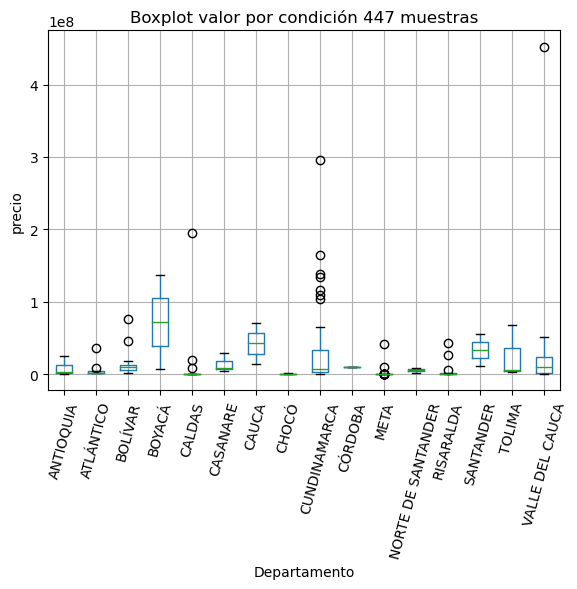

In [13]:
import matplotlib.pyplot as plt
fig = data.boxplot("Precio", by="Departamento");
muestras = data.shape[0];
plt.ylabel('precio');
plt.suptitle('');
plt.xticks(rotation=75);
plt.title(f'Boxplot valor por condición {muestras} muestras');

## Estudio de precio por cuidad y tipo de inmueble

Siempre y cuando la muestra total sea representativa (mas de 15 muestras)

Inmuebles no representativos por categoría


,Tipo inmueble,muestras
0,LOTE COMERCIAL,3
1,CLINICA,2
2,HOTEL,1
3,FINCA,5
4,LOTE MIXTO,6
5,LOTE INDUSTRIAL,3
6,EDIFICIO VIVIENDA,1
7,CASA,9
8,LOTE CON CONSTRUCCION,7
9,LOTE AGRICOLA,5


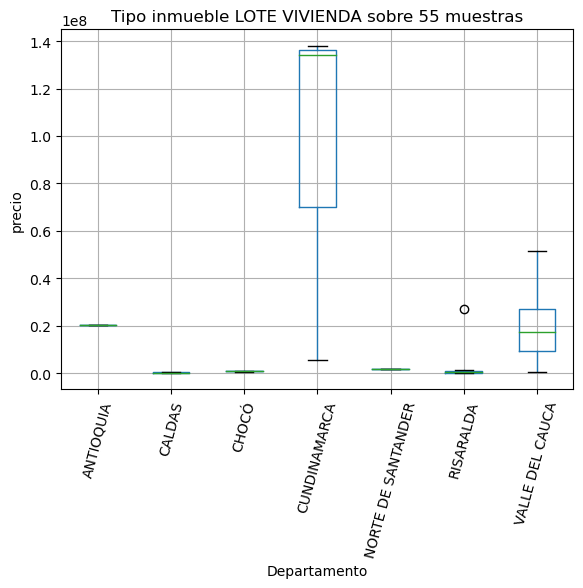

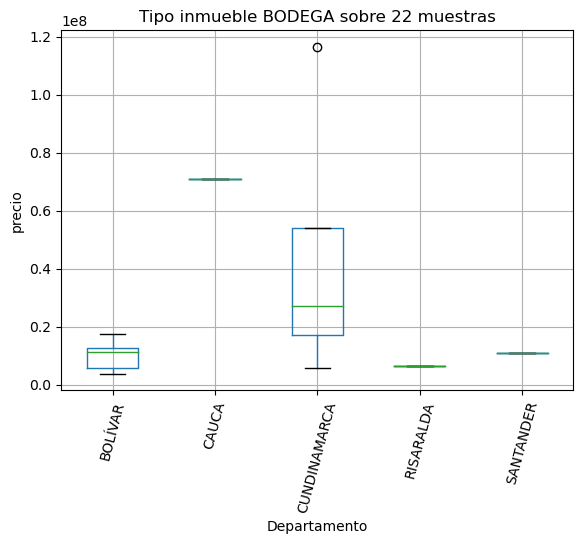

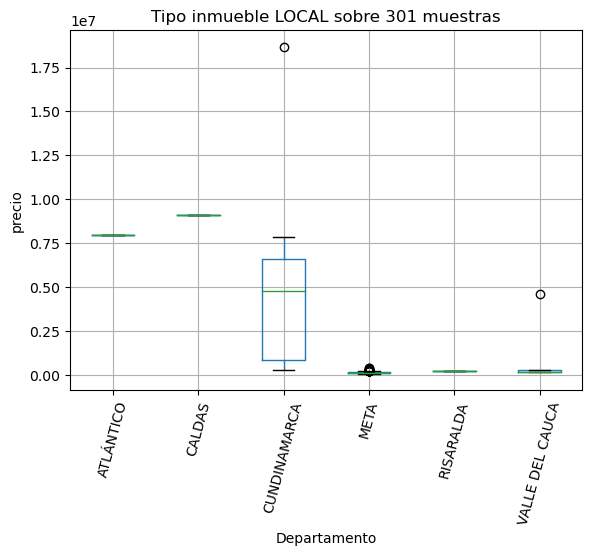

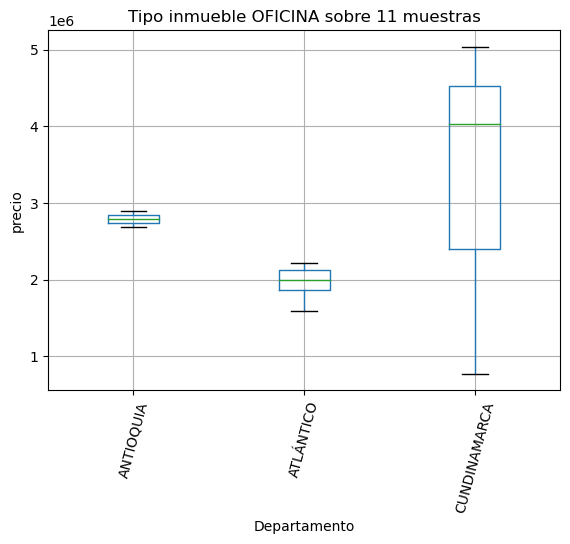

In [14]:
norepre = dict()
for tipoinmueble in data['Tipo de Inmueble'].unique():
    muestras = data[data['Tipo de Inmueble'] == tipoinmueble].shape[0]
    if muestras < 11:
        norepre[tipoinmueble] = muestras
        continue
    fig = data[data['Tipo de Inmueble'] == tipoinmueble].boxplot("Precio", by="Departamento")
    plt.ylabel('precio')
    plt.suptitle('')
    plt.xticks(rotation=75);
    plt.title(f'Tipo inmueble {tipoinmueble} sobre {muestras} muestras')
print('Inmuebles no representativos por categoría')
pd.DataFrame({'Tipo inmueble':norepre.keys(),'muestras':norepre.values()})

In [15]:
import matplotlib.pyplot as plt

In [16]:
# se identifica la cantida de diferenes departamentos en la muestra
def showbycity(departamento, minimo = 11):
    dpto = departamento.upper()
    muestras = data[data['Departamento'] == dpto].shape[0]
    if muestras < minimo:
        return (dpto, muestras)
    fig = data[data['Departamento'] == dpto].boxplot("Precio",by="Ciudad")
    plt.ylabel('Precio')
    plt.xticks(rotation=45);
    plt.suptitle('')
    plt.title(f'{dpto} valor por condición, {muestras} muestras')

# Estudio comparativo de variación de precios por cuidad

Omitidos en este punto por cantidad de muestras insuficientes


,Departamento,Muestras
0,BOYACÁ,2
1,ATLÁNTICO,8
2,CAUCA,2
3,NORTE DE SANTANDER,3
4,TOLIMA,3
5,SANTANDER,2
6,CHOCÓ,2
7,CASANARE,3
8,CÓRDOBA,1


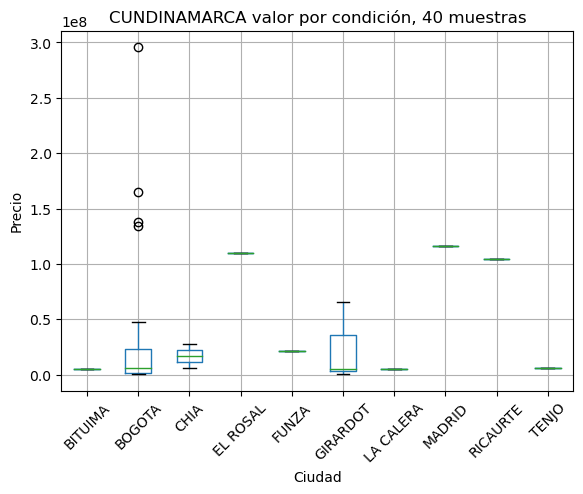

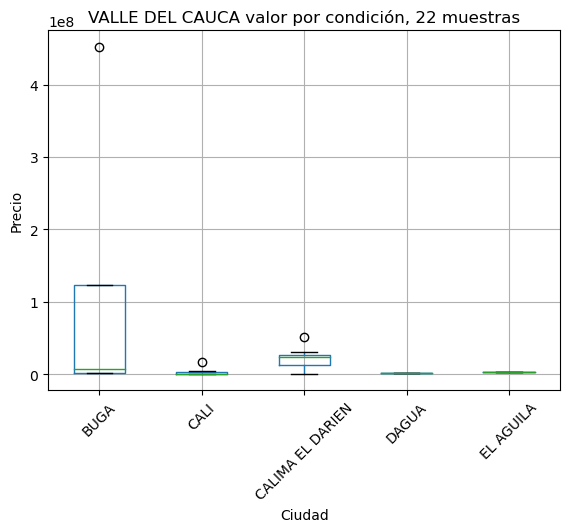

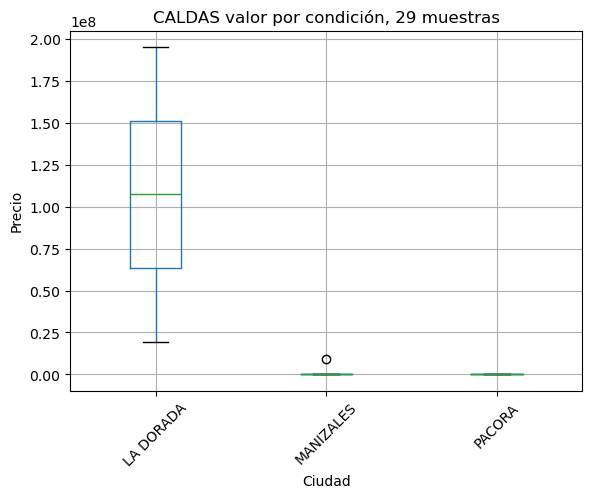

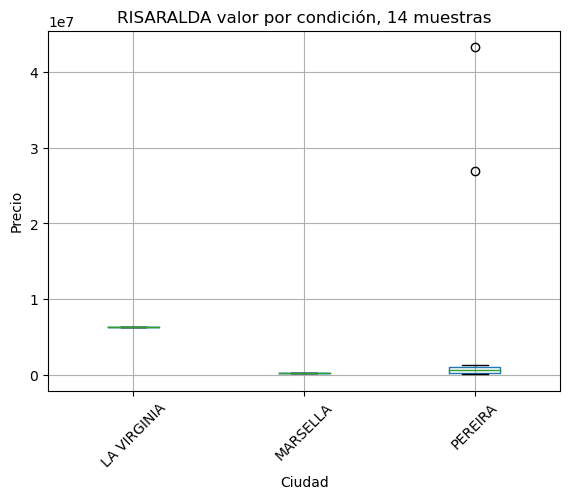

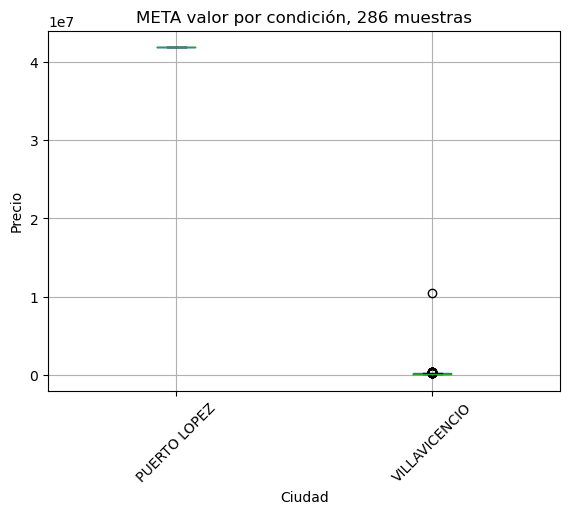

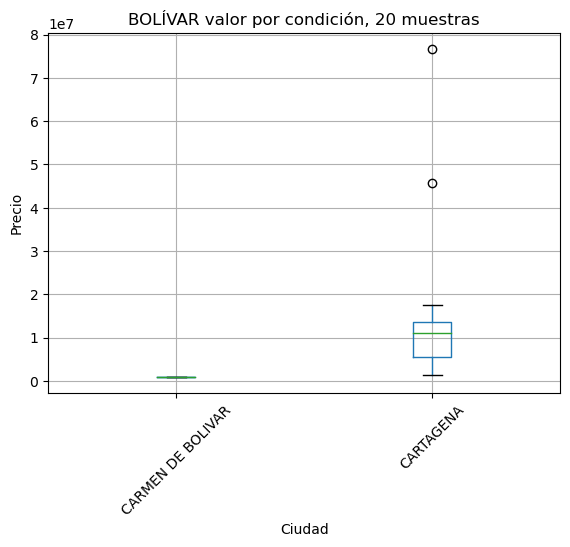

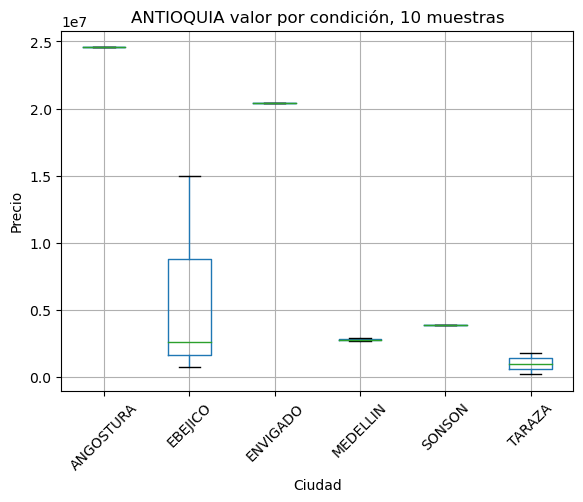

In [17]:
# se identifican todas las cuidades
res = dict()
for departamento in data['Departamento'].unique():
    val = showbycity(departamento, minimo=10)
    if val is None:
        continue
    res[val[0]] = val[1]
print('Omitidos en este punto por cantidad de muestras insuficientes')
pd.DataFrame({'Departamento': res.keys() , 'Muestras':res.values()})

## Estudio comparativo de variación de precios por estrato
Se convierte los valores de estrato a numéricos en una nueva columna, para que muestre los gráficos en orden

In [18]:
data['Estrato'].unique()
mapa={'UNO':1,
      'DOS':2,
      'TRES':3,
      'CUATRO':4,
      'CINCO':5,
      'SEIS':6,
      'RURAL': 8,
      'COMERCIAL':9,
      'INDUSTRIAL':10,
     }
data['Estrato_num'] = data.apply(lambda row: mapa[row.Estrato], axis = 1)
data.head(5)

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales,Estrato_num
0,2330,BOGOTA,CUNDINAMARCA,SANTA MATILDE,CL 10 SUR # 34B-24 LT 2 MZ X-46 (SANTA MATILDE...,559804,0,COMERCIALIZABLE CON RESTRICCION,TRES,1.342810e+08,LOTE VIVIENDA,NaN,3
1,2363,BOGOTA,CUNDINAMARCA,TINTALA,KR 84 CON CL 10 LT # 8 DE SAN JUAN DE CASTILLA...,302079,0,COMERCIALIZABLE CON RESTRICCION,TRES,3.285750e+07,LOTE COMERCIAL,"ESTE INMUEBLE PRESENTA ZONA DE RESERVA VIAL, Q...",3
2,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,165508,726900,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+08,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...,4
3,2669,LA CALERA,CUNDINAMARCA,LA CALERA,LOTE 3 PARCELACIÓN LOS CERROS HACIENDA SAN RAFAEL,3000000,0,COMERCIALIZABLE CON RESTRICCION,RURAL,5.520000e+06,LOTE VIVIENDA,NaN,8
4,4408,BOGOTA,CUNDINAMARCA,SUBA,DG 140 # 67 - 30 IN 6 (ZONA DE AFECTACIÓN PLAN...,1774266,0,COMERCIALIZABLE CON RESTRICCION,COMERCIAL,1.380382e+08,LOTE VIVIENDA,NaN,9


10) [x] Identifique columnas con valores erróneos

Para este punto uno de los validadores corresponde al área de terreno debe se mayor a cero, también el áre construida. Los reportes de los registros con valores erróneos se haran en archivos locales en formato csv

In [19]:
sin_area = data[data['Area Terreno'] == 0]['Area Terreno'].count();
print(f'Cantidad de registros sin area {sin_area}')

Cantidad de registros sin area 423


11) [x] Utilice gráficos para identificar valores atípicos

Ya se pueden visualizar en los puntos representados en los boxplot del punto anterior

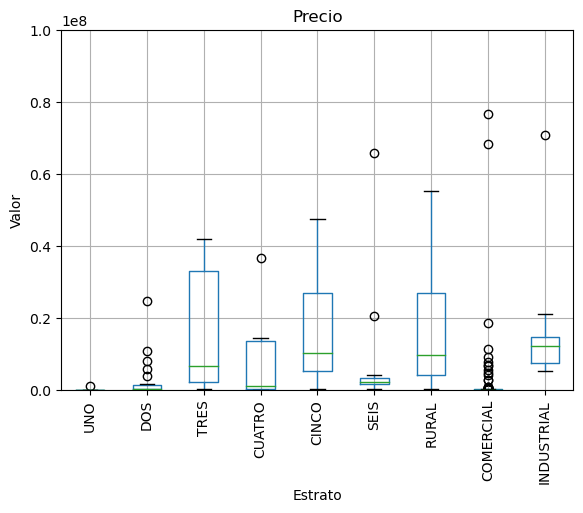

In [20]:
# se busca relacion entre el estrato y el valor de la vivenda
ax = data.boxplot('Precio', by='Estrato_num');
plt.suptitle('');
plt.ylim(0,100_000_000)# se modifican los límites para observar mejor los datos
plt.ylabel('Valor')
plt.xlabel('Estrato')
#plt.xticks(rotation=45);
ax.set_xticklabels(mapa.keys(), rotation='vertical', fontsize=10);

12) [x] Realice histogramas de frecuencia

Se graficarán:
* Cantidad de reportes por estrato
* Cantidad de reportes por departamento
* Rango de valores de vivienda

In [21]:
# se define el rango de valores a graficar
from math import ceil
bins = 100
minimo = data['Precio'].min(axis=0);
maximo = data['Precio'].max(axis=0);

In [22]:
def get_hist_values(data, minimo, maximo, bins):
    values = list();
    delta = ceil((maximo -minimo)/bins);
    initvalue = minimo;
    endvalue = minimo + delta;
    names = []
    inits = []
    ended = []
    cantidad = [] 
    k=1
    while initvalue < maximo:
        localmax = initvalue + delta + 0.01
        names.append(k)
        inits.append(initvalue)
        ended.append(localmax)
        cantidad.append(data[(data['Precio'] >= initvalue) & (data['Precio'] < localmax)].shape[0])
        initvalue = localmax
        k +=1
    print('Datos para construir el histograma');
    res = pd.DataFrame({'id': names, 'cantidad': cantidad, 'inicial': inits,'final':ended});
    return res

In [23]:
res = get_hist_values(data, minimo, maximo, bins)
res.head(20)

Datos para construir el histograma


,id,cantidad,inicial,final
0,1,364,63339.00,4586085.01
1,2,25,4586085.01,9108831.02
2,3,12,9108831.02,13631577.03
3,4,9,13631577.03,18154323.04
4,5,6,18154323.04,22677069.05
5,6,5,22677069.05,27199815.06
6,7,3,27199815.06,31722561.07
7,8,2,31722561.07,36245307.08
8,9,1,36245307.08,40768053.09
9,10,2,40768053.09,45290799.10


Con base en el punto anterior se nota que la mayor cantida de datos, 429, está hasta el valor de 76950021, por lo que se ajusta este como el valor límite y se corre nuevamente la función

In [24]:
res = get_hist_values(data, minimo, 76950021 , bins=200)
res.head(20)
#ax.set_xticklabels(res['inicial'], rotation='vertical', fontsize=10);
# se procede a graficar

Datos para construir el histograma


,id,cantidad,inicial,final
0,1,325,63339.00,447773.01
1,2,7,447773.01,832207.02
2,3,7,832207.02,1216641.03
3,4,5,1216641.03,1601075.04
4,5,6,1601075.04,1985509.05
5,6,4,1985509.05,2369943.06
6,7,2,2369943.06,2754377.07
7,8,1,2754377.07,3138811.08
8,9,0,3138811.08,3523245.09
9,10,4,3523245.09,3907679.10


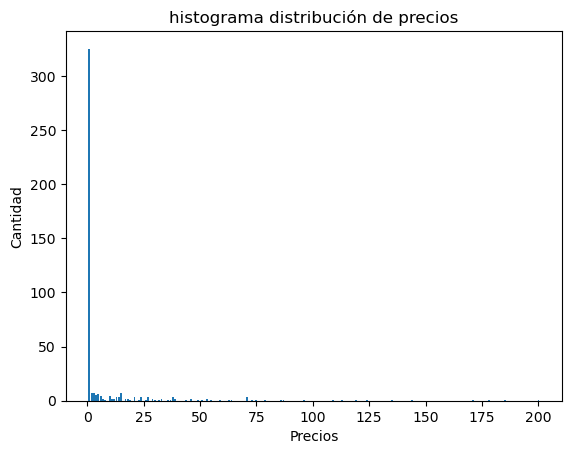

In [25]:
ax = plt.bar(res['id'], res['cantidad']);
plt.ylabel("Cantidad");
plt.xlabel('Precios');
plt.title('histograma distribución de precios');

In [26]:
# gráfica ampliada
res = get_hist_values(data, minimo, 447773.01 , bins=200)
res.head(20)

Datos para construir el histograma


,id,cantidad,inicial,final
0,1,1,63339.00,65262.01
1,2,0,65262.01,67185.02
2,3,1,67185.02,69108.03
3,4,2,69108.03,71031.04
4,5,0,71031.04,72954.05
5,6,0,72954.05,74877.06
6,7,59,74877.06,76800.07
7,8,0,76800.07,78723.08
8,9,0,78723.08,80646.09
9,10,0,80646.09,82569.10


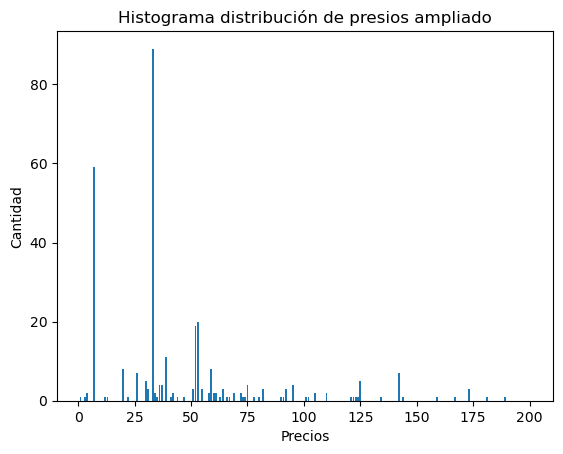

In [27]:
# se procede a graficar
axis = plt.bar(res['id'], res['cantidad']);
plt.title('Histograma distribución de presios ampliado')
plt.ylabel("Cantidad");
plt.xlabel('Precios');
#plt.tick_params(axis='x', length=0)

## Función para mejorar automáticamente el rango para hacer el estudio, sacando los datos abs
Para ello el rango a utilizar será
* límite inferior: Q2-1.5*IQR
* Límite superior: Q3+1.5*IQR

Donde Q2: es el cuartil 2, Q3: es el cuartil 3, IQR es el rango intercuartílico 

## Función para mejorar el cálculo del número de bins en forma automática

Si bien el número de bins se puede poner de forma manual sería recomendable poder hacerlo de forma automática, para ello se utilizará la fórmula de [Sturge’s rule](https://en.wikipedia.org/wiki/Histogram)

In [28]:
import numpy as np
def get_rango(data: pd.DataFrame, colname: str):
    res = data[colname].describe()
    q2 = res['25%']
    q3 = res['75%']
    iqr = q3-q2
    minvalue = q2-1.5*iqr;
    maxvalue = q3+1.5*iqr;
    bins = int(np.ceil(np.log2(data.shape[0])) + 1)
    return (max([0,minvalue]), maxvalue, max([1, bins]))

In [29]:
maximo, minimo, bins = get_rango(data, 'Precio');
print(f'Rango sugerido para el histograma {maximo} - {minimo}, intervalos = {bins} ')

Rango sugerido para el histograma 0 - 2291100.0, intervalos = 10 


In [30]:
res = get_hist_values(data, maximo, minimo, bins)
res.head(20)

Datos para construir el histograma


,id,cantidad,inicial,final
0,1,285,0.00,229110.01
1,2,40,229110.01,458220.02
2,3,4,458220.02,687330.03
3,4,4,687330.03,916440.04
4,5,4,916440.04,1145550.05
5,6,4,1145550.05,1374660.06
6,7,3,1374660.06,1603770.07
7,8,4,1603770.07,1832880.08
8,9,2,1832880.08,2061990.09
9,10,3,2061990.09,2291100.10


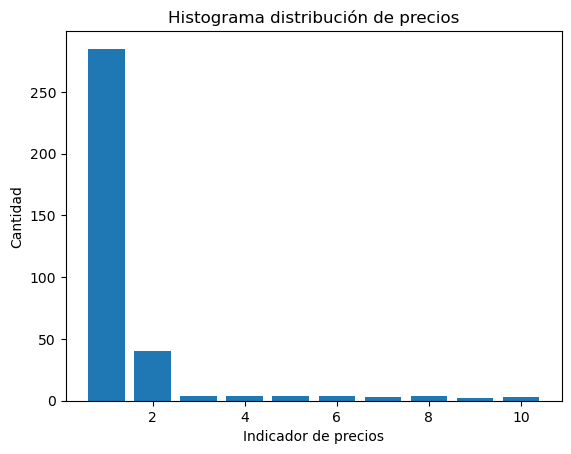

In [31]:
axis = plt.bar(res['id'], res['cantidad']);
plt.title('Histograma distribución de precios')
plt.ylabel("Cantidad");
plt.xlabel('Indicador de precios');

13) [x] Use la herramienta para gráficos para determinar correlación entre variables

Del análisis de eliminaron las columnas de área y area construida por tener mas de 400 datos con valor cero

In [32]:
import seaborn as sns

In [33]:
corr = data[['Estrato_num','Codigo','Precio','Departamento']].corr()

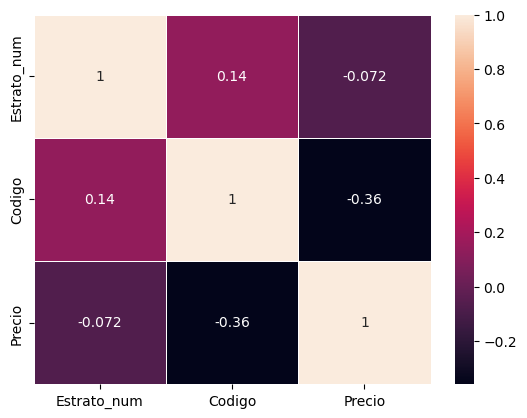

In [34]:
sns.heatmap(corr, linewidths=0.5, annot=True);

Con base en la gráfica se puede notar que la mayor relación está entre el estrato y el código de la vivienda, sin embargo como este último es solo un consecutivo se puede concluir que por falta de información en cuanto a las áreas no es posible concluir sobre una relación al respecto

14) [x] Realice y explique la eliminación de datos nulos y duplicados

Desde el punto 8 se eliminaron los datos duplicados y en el punto 7 se presentaron las columnas con valores nulos, ahora se procederá a buscar los datos nulos en cuanto al precio

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 458
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  447 non-null    int64  
 1   Ciudad                  447 non-null    object 
 2   Departamento            447 non-null    object 
 3   Barrio                  57 non-null     object 
 4   Direccion               447 non-null    object 
 5   Area Terreno            447 non-null    int64  
 6   Area Construida         447 non-null    int64  
 7   Detalle Disponibilidad  447 non-null    object 
 8   Estrato                 447 non-null    object 
 9   Precio                  447 non-null    float64
 10  Tipo de Inmueble        447 non-null    object 
 11  Datos Adicionales       92 non-null     object 
 12  Estrato_num             447 non-null    int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 48.9+ KB


Se filtran los contenidos con filas que tengan valores nulos en alguna de las columnas

In [36]:
columns = [k for (k, value) in data.items()]

In [37]:
dt = data
for k in columns:
    dt = dt[dt[k].notnull()];
dt.count()
#dropped = data.dropna(how='all', axis=1);
#dropped

Codigo                    37
Ciudad                    37
Departamento              37
Barrio                    37
Direccion                 37
Area Terreno              37
Area Construida           37
Detalle Disponibilidad    37
Estrato                   37
Precio                    37
Tipo de Inmueble          37
Datos Adicionales         37
Estrato_num               37
dtype: int64

## Resultado filas sin ningún valor nulo

In [45]:
dt.head(min([10,dt.shape[0]]))

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales,Estrato_num
1,2363,BOGOTA,CUNDINAMARCA,TINTALA,KR 84 CON CL 10 LT # 8 DE SAN JUAN DE CASTILLA...,302079,0,COMERCIALIZABLE CON RESTRICCION,TRES,3.285750e+07,LOTE COMERCIAL,"ESTE INMUEBLE PRESENTA ZONA DE RESERVA VIAL, Q...",3
2,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,165508,726900,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+08,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...,4
11,10106,BARRANQUILLA,ATLÁNTICO,CENTRO,CALLE 39 NO 43 58 62 LC 1,0,0,COMERCIALIZABLE CON RESTRICCION,DOS,8.000330e+06,LOCAL,DESEAS INVERTIR ESTA ES LA OPORTUNIDAD LOCAL E...,2
12,11335,CALI,VALLE DEL CAUCA,CIUDADELA CHIPICHAPE,LT B PARTE DEL PREDIO CHIPICHAPE,43039968,0,COMERCIALIZABLE FIDUCIA,RURAL,1.667784e+07,LOTE VIVIENDA,CISA VENDE SOLO LOS DERECHOS FIDUCIARIOS DEL 0...,8
14,11786,VILLA RICA,CAUCA,PARQUE INDUSTRIAL CAUCADESA,BG 20 ET I PARQUE INDUSTRIAL CAUCADESA KM 43 ...,3035300,1198100,COMERCIALIZABLE CON RESTRICCION,INDUSTRIAL,7.090341e+07,BODEGA,BODEGA EN PROINDIVISO. CON BUENAS ESPECIFICACI...,10
15,11787,SANTANDER DE QUILICHAO,CAUCA,PARQUE IND CAUCADESA,LT 8 ET I PARQUE INDUSTRIAL CAUCADESA,4612600,0,COMERCIALIZABLE CON RESTRICCION,RURAL,1.416213e+07,LOTE INDUSTRIAL,"LOTE TERRENO NETO , EN PROINDIVISO, SEMI-URBAN...",8
16,12112,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,RESERVA FORESTAL LT 1A,218786300,0,COMERCIALIZABLE FIDUCIA,RURAL,2.406650e+07,LOTE MIXTO,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...,8
17,12113,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 4,7114300,74533,COMERCIALIZABLE FIDUCIA,RURAL,2.700092e+07,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...,8
18,12114,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 1B,17598200,0,COMERCIALIZABLE FIDUCIA,RURAL,2.704525e+07,LOTE VIVIENDA,CISA VENDE DERECHOS FIDUCIARIOS DEL 9.48%\n\nF...,8
19,12115,CALIMA EL DARIEN,VALLE DEL CAUCA,VEREDA PALERMO,LT 1C,6400000,70000,COMERCIALIZABLE FIDUCIA,RURAL,1.042887e+07,LOTE VIVIENDA,LOTE DE TERRENO QUE HACE PARTE DEL PROYECTO CA...,8


15) [x] Agrupe columnas que considere pueden generar información importante
16) [x] Cree nuevas columnas a partir de las existentes

Se creará una columna nivel que agrupa las columnas de estrato y barrio

In [47]:
data['Nivel'] = data.apply(lambda row: f'{row.Estrato_num} - {row.Barrio}', axis=1)
data.head(10)

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales,Estrato_num,Nivel
0,2330,BOGOTA,CUNDINAMARCA,SANTA MATILDE,CL 10 SUR # 34B-24 LT 2 MZ X-46 (SANTA MATILDE...,559804,0,COMERCIALIZABLE CON RESTRICCION,TRES,1.342810e+08,LOTE VIVIENDA,NaN,3,3 - SANTA MATILDE
1,2363,BOGOTA,CUNDINAMARCA,TINTALA,KR 84 CON CL 10 LT # 8 DE SAN JUAN DE CASTILLA...,302079,0,COMERCIALIZABLE CON RESTRICCION,TRES,3.285750e+07,LOTE COMERCIAL,"ESTE INMUEBLE PRESENTA ZONA DE RESERVA VIAL, Q...",3,3 - TINTALA
2,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,165508,726900,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+08,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...,4,4 - CENTRO
3,2669,LA CALERA,CUNDINAMARCA,LA CALERA,LOTE 3 PARCELACIÓN LOS CERROS HACIENDA SAN RAFAEL,3000000,0,COMERCIALIZABLE CON RESTRICCION,RURAL,5.520000e+06,LOTE VIVIENDA,NaN,8,8 - LA CALERA
4,4408,BOGOTA,CUNDINAMARCA,SUBA,DG 140 # 67 - 30 IN 6 (ZONA DE AFECTACIÓN PLAN...,1774266,0,COMERCIALIZABLE CON RESTRICCION,COMERCIAL,1.380382e+08,LOTE VIVIENDA,NaN,9,9 - SUBA
5,5017,RICAURTE,CUNDINAMARCA,CONDOMINIO CAMPESTRE MONACO,LT 1 TAMBACU HO GIRARDOT RESORT,2500263,514200,COMERCIALIZABLE FIDUCIA,COMERCIAL,1.040734e+08,HOTEL,NaN,9,9 - CONDOMINIO CAMPESTRE MONACO
6,5287,BOGOTA,CUNDINAMARCA,NaN,LT # 899/900/901/902/903/904/905/906 CEMENTERI...,2240,0,COMERCIALIZABLE,COMERCIAL,5.143040e+05,LOTE COMERCIAL,LOS COSTOS POR CONCEPTO DE TRASPASO DE PROPIED...,9,9 - nan
7,5616,CHIA,CUNDINAMARCA,VEREDA FONQUETA,FINCA SAN ANTONIO DE LOS VIENTOS - VEREDA FONQ...,1113000,57000,COMERCIALIZABLE CON RESTRICCION,RURAL,2.785554e+07,FINCA,NaN,8,8 - VEREDA FONQUETA
8,7394,BITUIMA,CUNDINAMARCA,VEREDA DE CAMBULAR,FINCA BUENAVISTA Y BUENOS AIRES,18000000,0,COMERCIALIZABLE CON RESTRICCION,RURAL,4.806000e+06,FINCA,NaN,8,8 - VEREDA DE CAMBULAR
9,7539,TENJO,CUNDINAMARCA,NaN,CHURUGUACO LA GUACA,0,0,COMERCIALIZABLE CON RESTRICCION,RURAL,6.369860e+06,FINCA,NaN,8,8 - nan


17) [x] Identifique columnas que no aportan de acuerdo con su pregunta objetivo

Acorde con la información analizada se idenfica que las columnas que no aportan para el análisis son 

1. Codigo
2. Area -  porque la mayoría son datos sin reportar o cero
3. Detalle Disponibilidad
4. Direccion

18) [x] Realice conclusiones sobre las variables que considere tienen mayor relevancia

Conclusiones:

1. No se pudo realizar el análisis concluyente por no porder calcular el valor por metro cuadrado
2. La mayor cantidad de datos reportador fueron hast  458_220 millones
3. La mayor variablidad de precios se encuentra en el sector rural.
4. La mayor información disponible está para los **locales** con 301 muestras.
5. Para realizar una compra se deberá completar la información de las áreas y tomar una mejor desición con base en la evidencia


19) [x] Dejar documentado usando gráficos y capturas de pantalla todo el proceso realizado.

Se hizo por este medio